# FX Volatility surfaces

This notebook demonstrates how to access and use the surfaces end point of Instrument Pricing Analytics (IPA) in the Refinitiv Data Libraries.

##### Learn more

To learn more about the Refinitiv Data Library for Python please join the Refinitiv Developer Community. By [registering](https://developers.refinitiv.com/iam/register) and [logging](https://developers.refinitiv.com/content/devportal/en_us/initCookie.html) into the Refinitiv Developer Community portal you will have free access to a number of learning materials like 
 [Quick Start guides](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/quick-start), 
 [Tutorials](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/tutorials), 
 [Documentation](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/documentation)
 and much more.

You may also visit the [API Playground](https://apidocs.refinitiv.com/Apps/ApiDocs) to get more examples, find  end points and download Swagger files

##### Getting Help and Support

If you have any questions regarding using the API, please post them on 
the [Refinitiv Data Q&A Forum](https://community.developers.refinitiv.com/spaces/321/index.html). 
The Refinitiv Developer Community will be happy to help. 

In [2]:
import refinitiv.data as rd
from refinitiv.data.content.ipa import surfaces
import plotly.graph_objects as go

## Open the data session

The open_session() function creates and open sessions based on the information contained in the refinitiv-data.config.json configuration file. Please edit this file to set the session type and other parameters required for the session you want to open.

In [3]:
rd.open_session()

<refinitiv.data.session.Definition object at 0x7ff3b5fafd30 {name='codebook'}>

In [4]:
surface_tag = "EUR/DKK"

In [5]:
response = surfaces.fx.Definition(
    surface_tag=surface_tag,
    underlying_definition=surfaces.fx.FxSurfaceDefinition(
        fx_cross_code="EURDKK"
    ),
    surface_parameters=surfaces.fx.FxCalculationParams(
        volatility_model="SVI",
        x_axis="Tenor",
        y_axis="Delta",
        calculation_date="2020-10-15",
    ),
    surface_layout=surfaces.fx.SurfaceLayout(
        format="Matrix",
    ),
).get_data()

display(response.data.df)

,3M,6M,9M,1Y,2Y
-0.1,2.130132,2.744177,2.993914,3.252395,3.56625
-0.15,1.73647,2.233355,2.452704,2.673492,2.983187
-0.2,1.431942,1.836533,2.03394,2.225124,2.538072
-0.25,1.18485,1.513393,1.69223,1.85751,2.177894
-0.3,0.986741,1.255971,1.413065,1.553651,1.881362
-0.35,0.838232,1.070998,1.194903,1.311458,1.639737
-0.4,0.738127,0.959863,1.037636,1.133378,1.449187
-0.45,0.678628,0.908534,0.93485,1.016559,1.306504
ATM,0.65,0.9,0.874472,0.95,1.2
0.45,0.646691,0.924565,0.851694,0.927599,1.139294


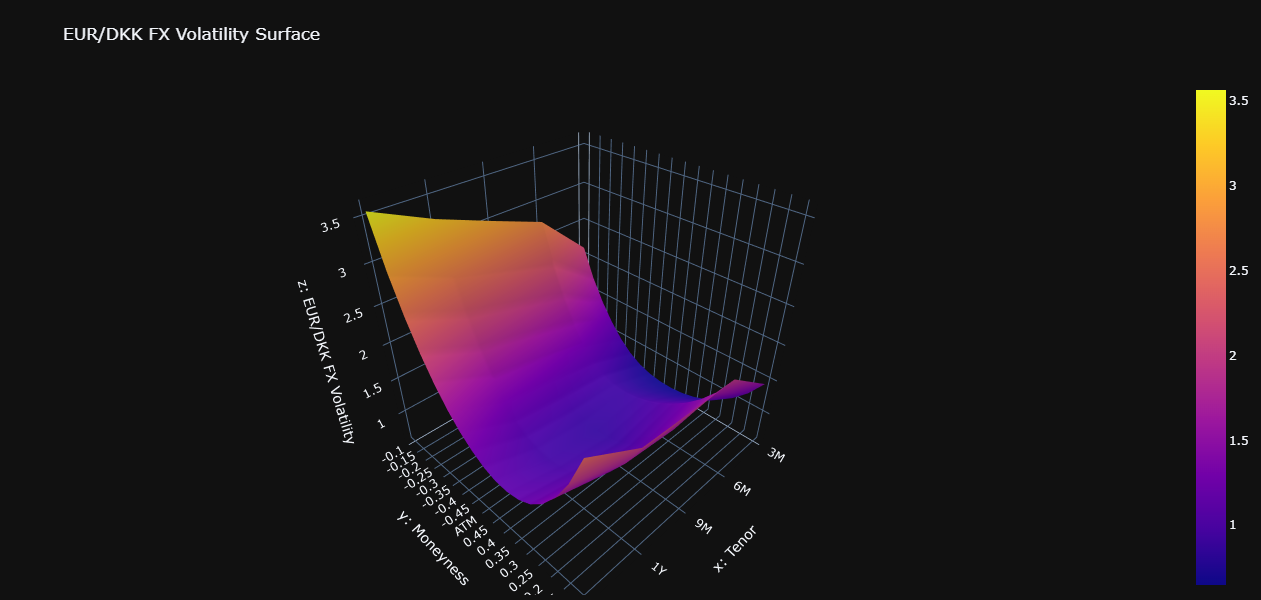

In [16]:
surface_df = response.data.df.copy()
surface_df.columns.name = "Tenor"
surface_df.index.name = "Moneyness"

fig = go.Figure(data=[go.Surface(z=surface_df.values)])

fig.update_layout(
    template="plotly_dark",
    title=f"{surface_tag} FX Volatility Surface",
    autosize=False,
    width=1000, height=600,
    margin=dict(l=5, r=5, b=5, t=80),
    scene=dict(
        xaxis_title=f"x: {surface_df.columns.name}",
        yaxis_title=f"y: {surface_df.index.name}",
        zaxis_title=f"z: {surface_tag} FX Volatility",
        xaxis=dict(ticktext=list(surface_df.columns),
                   tickvals=[i for i in range(len(surface_df.columns))]),
        yaxis=dict(ticktext=list(surface_df.index),
                   tickvals=[i for i in range(len(surface_df))])
    ))

fig.show()

In [4]:
rd.close_session()